![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Natural Language Processing - Lecture 1</a>

## Final Project: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset. 

#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [1]:
import pandas as pd

train_df = pd.read_csv('../data/final_project/imdb_train.csv', header=0)
train_df.head()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


#### __Test data:__

In [2]:
import pandas as pd

test_df = pd.read_csv('../data/final_project/imdb_test.csv', header=0)
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


# Data Exploration

In [3]:
#Exlore distribution of classes
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

#Explore NaNs
print(train_df.isnull().values.any())
print(test_df.isnull().values.any())

0    12500
1    12500
Name: label, dtype: int64
0    12500
1    12500
Name: label, dtype: int64
False
False


# Preprocessing

In [4]:
#Download relevant nltk packages
import nltk, re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshbordia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshbordia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshbordia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#Stop words removal
#Not all stop words are bad in this scenario. We will retain some helpful words as shown below
from nltk.corpus import stopwords
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

accepted_stopwords = list(set(stopwords.words('english')).symmetric_difference(set(excluding)))

In [6]:
#Setup tokenizer and lemmatizer for preprocessing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

In [9]:
"""
Convert to lower case
Remove trailing white space
Remove intermediate extra white space
Remove HTML tags
Lemmatize individual words
"""
def preprocess(text):
    processed_sentences = []
    temp = ""
    for i in range(0, len(text)):
        temp = text[i]
        temp = temp.lower()
        temp = temp.strip()
        temp = re.sub('\s+', ' ', temp)
        temp = re.compile('<.*?>').sub('', temp)
        
        selected_words = []
        for word in word_tokenize(temp):
            if(word not in accepted_stopwords):
                selected_words.append(lemmatizer.lemmatize(word))
        
        processed_sentences.append(" ".join(selected_words))
        temp = ""
    return processed_sentences

In [10]:
train_X = preprocess(train_df['text'].values)
test_X = preprocess(test_df['text'].values)

In [11]:
train_y = train_df['label'].values
test_y = test_df['label'].values

# Building Features

In [12]:
# Build TF-IDF features to be fed into model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
train_X = vectorizer.fit_transform(train_X)

In [13]:
print(vectorizer.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '13th', '14', '15', '16', '17', '18', '1930', '1930s', '1933', '1936', '1939', '1940', '1950', '1950s', '1960', '1960s', '1968', '1970', '1970s', '1971', '1972', '1973', '1978', '1980', '1980s', '1983', '1984', '1987', '1988', '1989', '1990', '1993', '1995', '1996', '1997', '1999', '19th', '1st', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '20th', '22', '24', '25', '2nd', '30', '3000', '35', '3d', '3rd', '40', '45', '50', '60', '70', '70s', '75', '80', '80s', '90', '99', 'abandoned', 'abc', 'ability', 'able', 'about', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'absurdity', 'abuse', 'abused', 'abusive', 'abysmal', 'academy', 'accent', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'acclaimed', 'accompanied', 'accomplish', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 

In [14]:
vectorizer.vocabulary_

{'movie': 2928,
 'make': 2719,
 'want': 4817,
 'throw': 4503,
 'every': 1568,
 'time': 4518,
 'see': 3893,
 'take': 4394,
 'first': 1758,
 'plot': 3324,
 'leave': 2567,
 'sea': 3878,
 'daughter': 1162,
 'go': 1950,
 'character': 779,
 'give': 1938,
 'new': 3008,
 'animal': 261,
 'name': 2965,
 'crappy': 1070,
 'animation': 263,
 'biggest': 503,
 'suck': 4307,
 'factor': 1650,
 'possible': 3369,
 'get': 1927,
 'little': 2631,
 'basically': 433,
 'copy': 1035,
 'll': 2636,
 'horror': 2184,
 'step': 4223,
 'people': 3241,
 '1st': 44,
 'prince': 3425,
 'eric': 1543,
 'still': 4233,
 'line': 2617,
 'whole': 4886,
 'annoying': 271,
 'not': 3049,
 'spirit': 4161,
 'saw': 3844,
 'fact': 1649,
 'exact': 1578,
 'opposite': 3128,
 'le': 2554,
 'cute': 1129,
 'convincing': 1027,
 'joke': 2425,
 'funny': 1878,
 'anymore': 281,
 'kid': 2475,
 'talk': 4400,
 'dumb': 1412,
 'voice': 4788,
 'king': 2485,
 'probably': 3436,
 'best': 490,
 'love': 2674,
 'melody': 2806,
 'appear': 295,
 'like': 2607,
 's

# Model Training

In [15]:
#Cross Validation using KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Test different K values
k_values = range(7, 35, 2)
scores = []
for i in range(0, len(k_values)):
    knn = KNeighborsClassifier(n_neighbors = k_values[i])
    scores.append(cross_val_score(knn, train_X, train_y , cv=5).mean())

print('Max Score: ', max(scores))
print('Max K: ', k_values[scores.index(max(scores))])

Max Score:  0.78808
Max K:  33


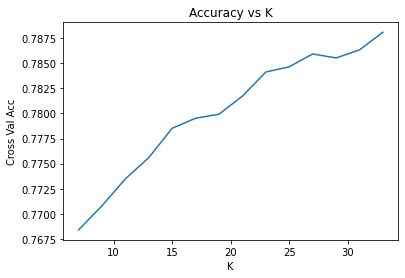

In [16]:
#Plot K values
import matplotlib.pyplot as plt
plt.plot(k_values, scores)
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Cross Val Acc')
plt.show()

Well, the curve seems to be going up (though the increase is not great). Might we worth testing greater K values.

In [17]:
#Fit best KNN
knn = KNeighborsClassifier(n_neighbors = k_values[scores.index(max(scores))])
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=33)

# Testing

In [19]:
#Evaluate performance on test set
from sklearn.metrics import classification_report
print(classification_report(test_y, knn.predict(vectorizer.transform(test_X))))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     12500
           1       0.74      0.74      0.74     12500

    accuracy                           0.74     25000
   macro avg       0.74      0.74      0.74     25000
weighted avg       0.74      0.74      0.74     25000

